# Load datasets from kaggle

In [ ]:
# !pip install -q kaggle
# from google.colab import files

# files.upload()

In [ ]:
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# import os
# import kaggle

# # Đường dẫn đến tệp tin khóa API JSON
# api_token = '/content/kaggle.json'

# # Thiết lập đường dẫn cho tệp tin khóa API
# os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# # Tải xuống file CSV từ Kaggle
# kaggle.api.dataset_download_files('parisrohan/credit-score-classification', path='/content', unzip=True)


# Import the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statistics
import re
import missingno as msno
import folium
import plotly.express as px
import plotly.graph_objects as go
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix
from folium.plugins import HeatMap
from plotly.subplots import make_subplots
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
RANDOM_STATE = 42

# Review the dataset

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
# View data type of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
## Check for null data
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum() / df_train.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
print(missing_data)

# Total amount of data lost in the entire DataFrame
total_missing = missing_data.sum()
print('Tổng số lượng dữ liệu bị mất mát:', total_missing)

                          Total     %
Monthly_Inhand_Salary     15002  15.0
Type_of_Loan              11408  11.4
Name                       9985  10.0
Credit_History_Age         9030   9.0
Num_of_Delayed_Payment     7002   7.0
Amount_invested_monthly    4479   4.5
Num_Credit_Inquiries       1965   2.0
Monthly_Balance            1200   1.2
ID                            0   0.0
Changed_Credit_Limit          0   0.0
Payment_Behaviour             0   0.0
Total_EMI_per_month           0   0.0
Payment_of_Min_Amount         0   0.0
Credit_Utilization_Ratio      0   0.0
Outstanding_Debt              0   0.0
Credit_Mix                    0   0.0
Delay_from_due_date           0   0.0
Customer_ID                   0   0.0
Num_of_Loan                   0   0.0
Interest_Rate                 0   0.0
Num_Credit_Card               0   0.0
Num_Bank_Accounts             0   0.0
Annual_Income                 0   0.0
Occupation                    0   0.0
SSN                           0   0.0
Age         

In [ ]:
#Check statistical values for fields with numerical datatype
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
#Check statistical values for fields with other than numerical datatype
df_train.describe(include = "object").T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [ ]:
# Thống kê dữ liệu
# msno.bar(df_train)
# plt.show()

# Functions

## Create functions

In [ ]:
def get_column_details(df,column):
    print("Details of",column,"column")

    #DataType of column
    print("\nDataType: ",df[column].dtype)

    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())

    #Get Distribution of Column
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [ ]:
def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())

    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
    df[column] = df[column].fillna(mode_per_group)

    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())

In [ ]:
#Method to clean categorical field

def clean_categorical_field(df,groupby,column,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")

    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    #For each Customer_ID, assign same value for the column
    fill_missing_with_group_mode(df,groupby,column)

In [ ]:
# Handle Outliers and null values
def fix_inconsistent_values(df, groupby, column):
    print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')

    df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
    mini, maxi = x[0][0], y[0][0]

    # assign Wrong Values to NaN
    col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)|(x<0)) else x)

    # fill with local mode
    mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df[column] = col.fillna(mode_by_group)
    df[column].fillna(df[column].mean(),inplace=True)

    print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
    print("\nNo. of Unique values after Cleaning:",df[column].nunique())
    print("\nNo. of Null values after Cleaning:",df[column].isnull().sum())

In [ ]:
#Method to clean Numerical Field
def clean_numerical_field(df,groupby,column,strip=None,datatype=None,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")

    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    # Remove trailing & leading special characters
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")

    # Change datatype
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    fix_inconsistent_values(df, groupby, column)

In [ ]:
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.countplot(data=df, x=column)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [ ]:
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [ ]:
def plot_stacked_bar(df,column1,column2,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)

    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

## Categorical Variables

Credit Score

There are 3 different Credit Score - Standard, Good & Poor.
Distribution of credit score -

a) Standard - 53%

b) Poor - 29%

c) Good - 17%

There are no null values for Credit Score.

Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

-----------------------------------------------------

Credit Score Distribution


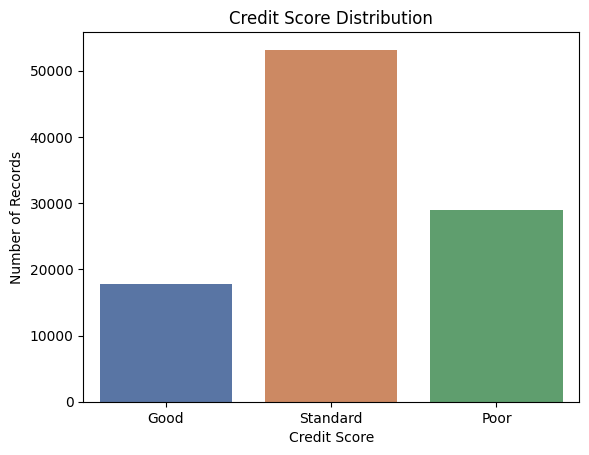

In [ ]:
column_name = 'Credit_Score'
user_friendly_name = 'Credit Score'

#Get Details
get_column_details(df_train,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name)

In [ ]:
#Get Details
get_column_details(df_train,'ID')

Details of ID column

DataType:  object

There are no null values

Number of Unique Values:  100000

Distribution of column:

0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64


In [ ]:
#Get Details
get_column_details(df_train,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64


In [ ]:
#Check if same customer can have different credit score
df_train.groupby(['Customer_ID'])['Credit_Score'].nunique()

Customer_ID
CUS_0x1000    2
CUS_0x1009    1
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     2
CUS_0xff4     1
CUS_0xff6     2
CUS_0xffc     2
CUS_0xffd     2
Name: Credit_Score, Length: 12500, dtype: int64

Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

-----------------------------------------------------

Month & Credit_Score Distribution


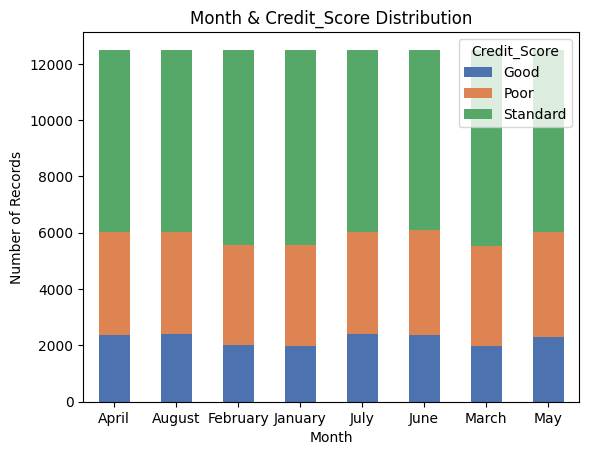

In [ ]:
column_name = 'Month'

#Get Details
get_column_details(df_train,column_name)

#Plot Distrbution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score')

In [ ]:
#Convert Month to datetime object
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month

In [ ]:
column_name = 'Name'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name)

Details of Name column

DataType:  object

There are  9985  null values

Number of Unique Values:  10139

Distribution of column:

Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64

-----------------------------------------------------

Cleaning steps 

No. of missing values before filling with group mode: 9985

No. of missing values after filling with group mode: 0


In [ ]:
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

Details of SSN column

DataType:  object

There are no null values

Number of Unique Values:  12501

Distribution of column:

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value #F%$D@*&8 is replaced with np.nan

No. of missing values before filling with group mode: 5572

No. of missing values after filling with group mode: 0


Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 7062

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Occupation & Credit_Score Distribution


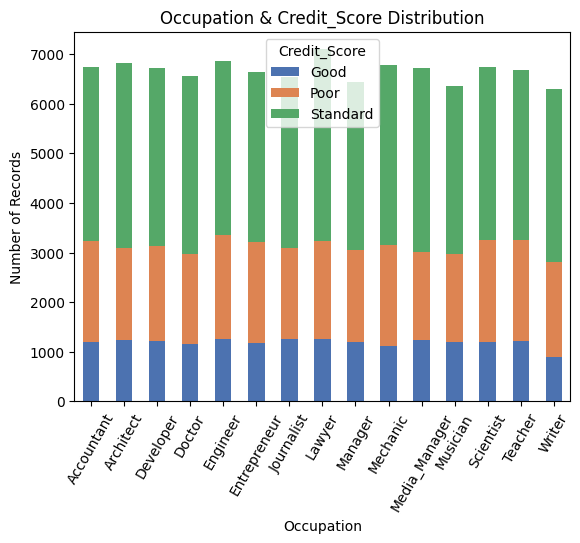

In [ ]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

In [ ]:
#Get Details of Type of Loan column
get_column_details(df_train,'Type_of_Loan')

Details of Type_of_Loan column

DataType:  object

There are  11408  null values

Number of Unique Values:  6260

Distribution of column:

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loa

In [ ]:
#Handle Type of Loan null values
df_train['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

No. of missing values before filling with group mode: 20195

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Credit_Mix & Credit_Score Distribution


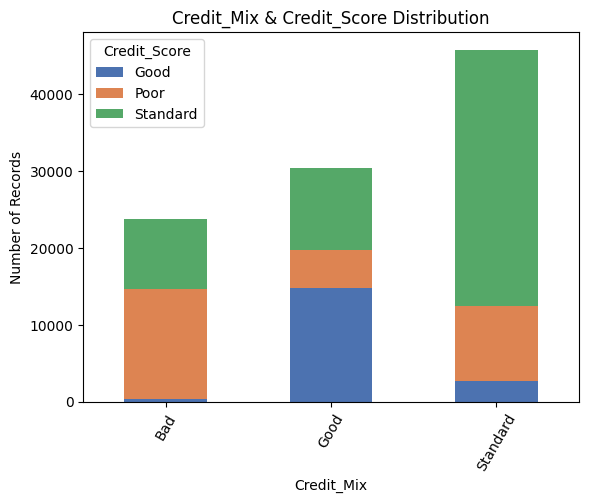

In [ ]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

-----------------------------------------------------

Payment_of_Min_Amount & Credit_Score Distribution


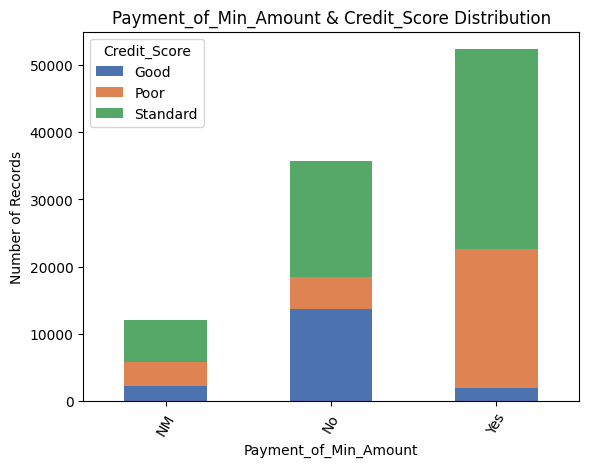

In [ ]:
column_name = 'Payment_of_Min_Amount'

#Get Details
get_column_details(df_train,column_name)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

Details of Payment_Behaviour column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 7600

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Payment_Behaviour & Credit_Score Distribution


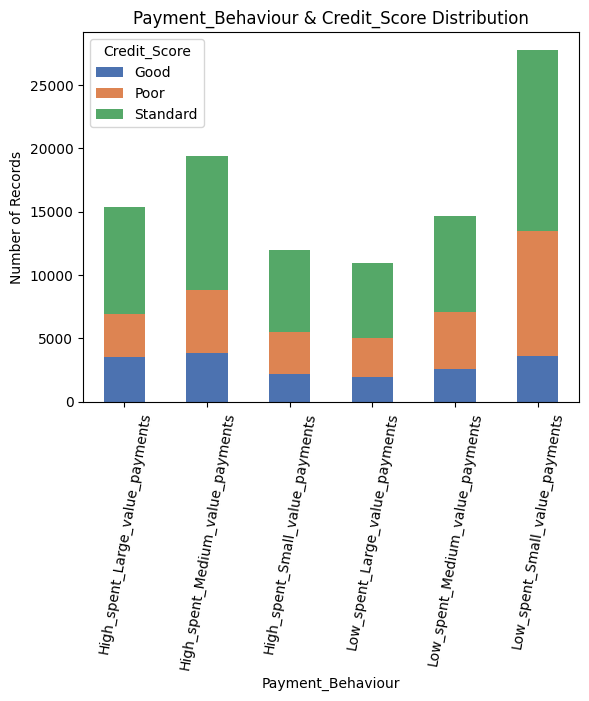

In [ ]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=80)

In [ ]:
# !pip install fix_inconsistent_values

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  1788

Distribution of column:

38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Age is changed to int

Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int64

After Cleaning Min, Max Values:
min    14.0
max    56.0
Name: Age, dtype: float64

No. of Unique values after Cleaning: 43

No. of Null values after Cleaning: 0

-----------------------------------------------------

Age Distribution


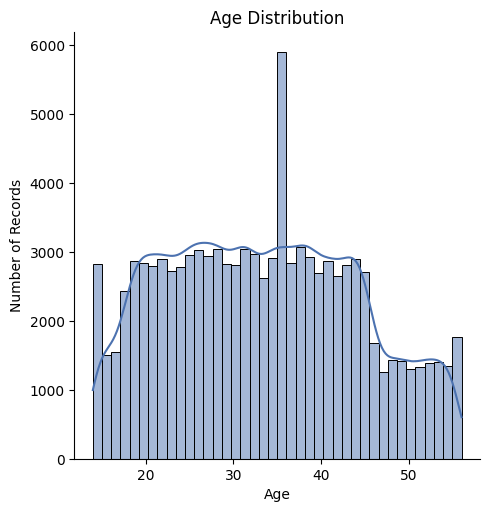

In [ ]:
column_name = 'Age'
group_by = 'Customer_ID'
user_friendly_name = 'Age'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='int')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=40)

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  18940

Distribution of column:

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Annual_Income is changed to float

Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64

After Cleaning Min, Max Values:
min      7005.93
max    179987.28
Name: Annual_Income, dtype: float64

No. of Unique values after Cleaning: 12488

No. of Null values after Cleaning: 0

-----------------------------------------------------

Annual Income Distribution


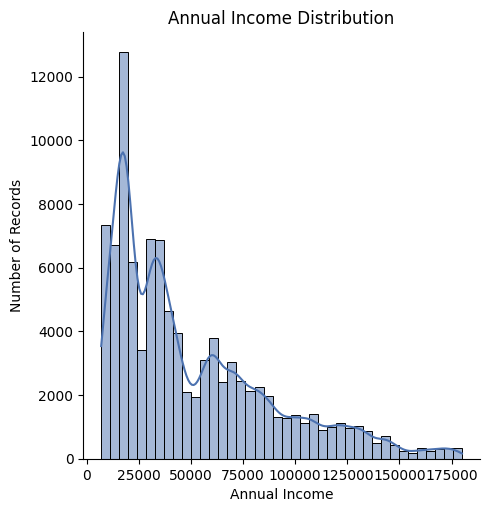

In [ ]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'
user_friendly_name = 'Annual Income'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=40)

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  15002  null values

Number of Unique Values:  13235

Distribution of column:

6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

After Cleaning Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

No. of Unique values after Cleaning: 13235

No. of Null values after Cleaning: 0

-----------------------------------------------------

Monthly Inhand Salary Distribution


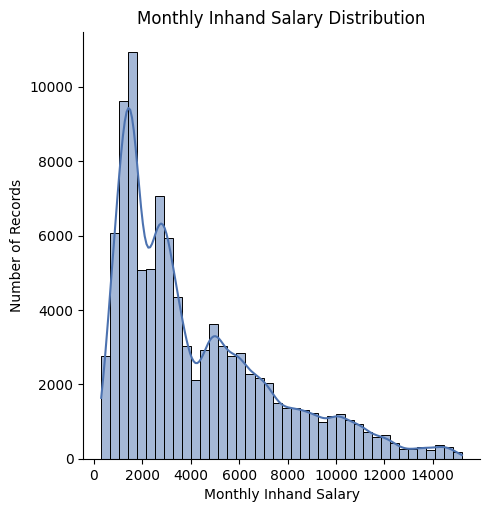

In [ ]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Inhand Salary'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=40)

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  943

Distribution of column:

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

After Cleaning Min, Max Values:
min    -1.0
max    10.0
Name: Num_Bank_Accounts, dtype: float64

No. of Unique values after Cleaning: 12

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Bank Accounts Distribution


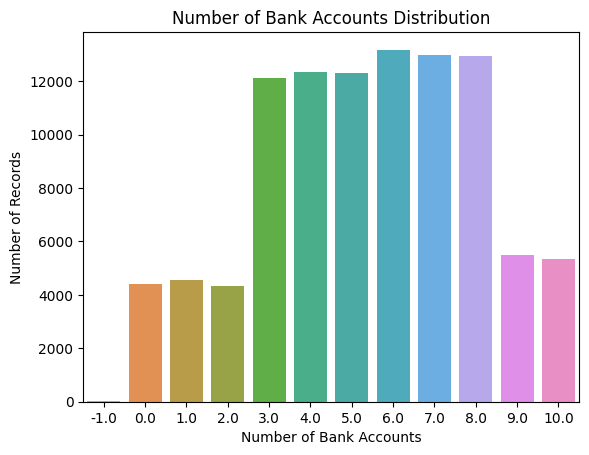

In [ ]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Bank Accounts'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name)

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  1179

Distribution of column:

5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: Num_Credit_Card, Length: 1179, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

After Cleaning Min, Max Values:
min     0.0
max    11.0
Name: Num_Credit_Card, dtype: float64

No. of Unique values after Cleaning: 12

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Credit Card Distribution


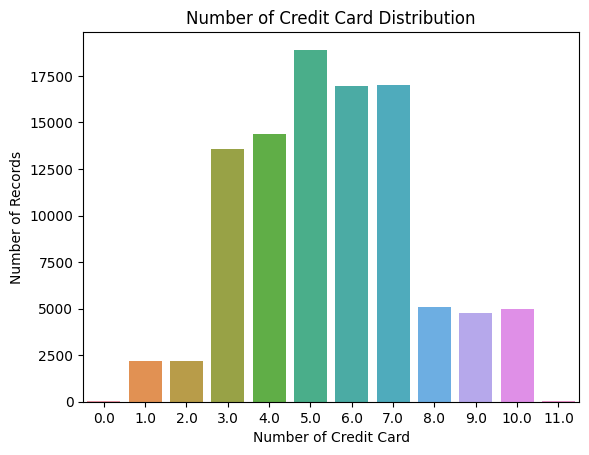

In [ ]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Card'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name)

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  1750

Distribution of column:

8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: Interest_Rate, Length: 1750, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       1
max    5797
Name: Interest_Rate, dtype: int64

After Cleaning Min, Max Values:
min     1.0
max    34.0
Name: Interest_Rate, dtype: float64

No. of Unique values after Cleaning: 34

No. of Null values after Cleaning: 0

-----------------------------------------------------

Interest Rate Distribution


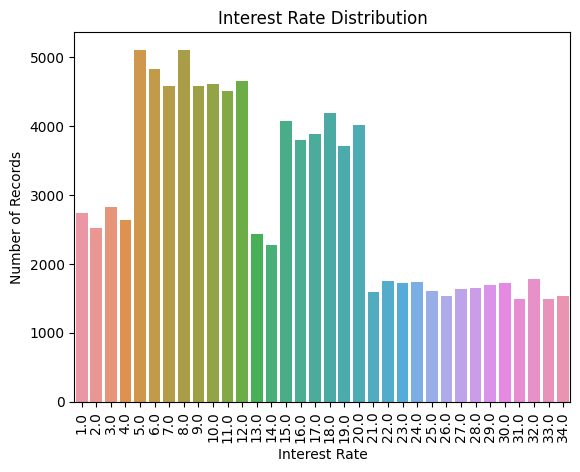

In [ ]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'
user_friendly_name = 'Interest Rate'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: Delay_from_due_date, Length: 73, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

After Cleaning Min, Max Values:
min    -5.0
max    62.0
Name: Delay_from_due_date, dtype: float64

No. of Unique values after Cleaning: 68

No. of Null values after Cleaning: 0

-----------------------------------------------------

Delay from Due Date Distribution


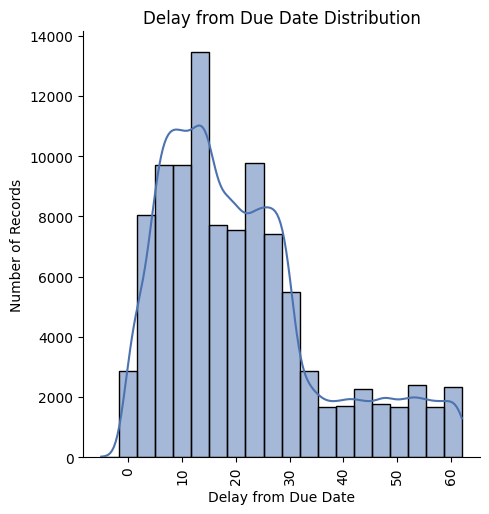

In [ ]:
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'
user_friendly_name = 'Delay from Due Date'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Num_of_Delayed_Payment column

DataType:  object

There are  7002  null values

Number of Unique Values:  749

Distribution of column:

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Delayed_Payment is changed to float

Existing Min, Max Values:
min      -3.0
max    4397.0
Name: Num_of_Delayed_Payment, dtype: float64

After Cleaning Min, Max Values:
min    -2.0
max    28.0
Name: Num_of_Delayed_Payment, dtype: float64

No. of Unique values after Cleaning: 31

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Delayed Payment Distribution


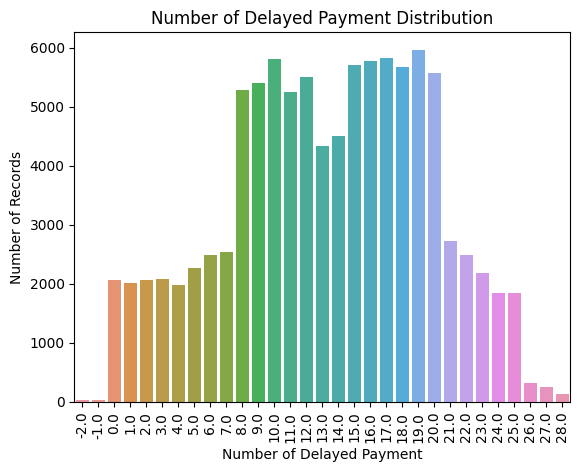

In [ ]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Delayed Payment'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  4384

Distribution of column:

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Changed_Credit_Limit is changed to float

Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64

After Cleaning Min, Max Values:
min    -5.01
max    29.98
Name: Changed_Credit_Limit, dtype: float64

No. of Unique values after Cleaning: 3532

No. of Null values after Cleaning: 0

-------------------------

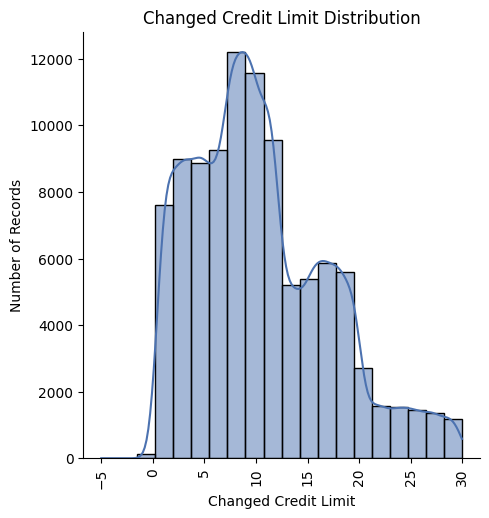

In [ ]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'
user_friendly_name = 'Changed Credit Limit'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float',replace_value='_')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Num_Credit_Inquiries column

DataType:  float64

There are  1965  null values

Number of Unique Values:  1223

Distribution of column:

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

After Cleaning Min, Max Values:
min     0.0
max    17.0
Name: Num_Credit_Inquiries, dtype: float64

No. of Unique values after Cleaning: 18

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Credit Inquiries Distribution


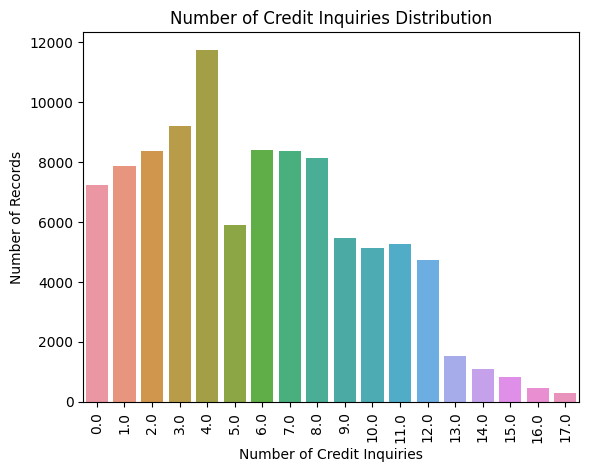

In [ ]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Inquiries'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  13178

Distribution of column:

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Outstanding_Debt is changed to <class 'float'>

Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

After Cleaning Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

No. of Unique values after Cleaning: 12203

No. of Null values after Cleaning: 0

-----------------------------------------------------

Outstanding Debt Distribution


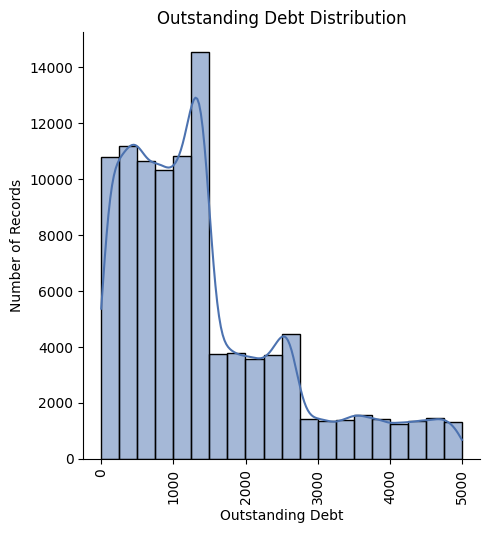

In [ ]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'
user_friendly_name = 'Outstanding Debt'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  100000

Distribution of column:

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

-----------------------------------------------------

Credit Utilization Ratio Distribution


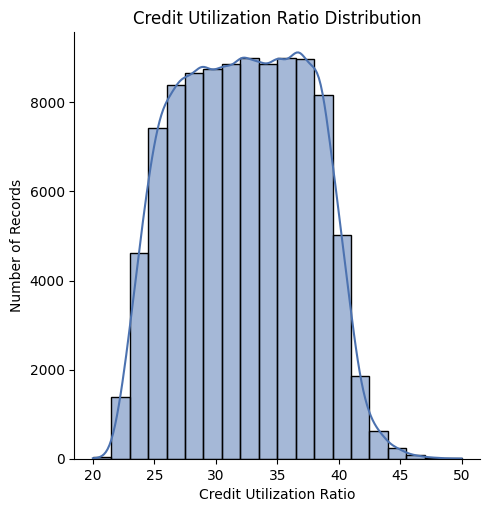

In [ ]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'
user_friendly_name = 'Credit Utilization Ratio'

#Get Details
get_column_details(df_train,column_name)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name)

In [ ]:
df_train['Credit_History_Age'].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [ ]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

Details of Credit_History_Age column

DataType:  float64

There are  9030  null values

Number of Unique Values:  404

Distribution of column:

191.0    446
232.0    445
233.0    444
215.0    443
231.0    441
        ... 
3.0       20
2.0       15
403.0     14
404.0     12
1.0        2
Name: Credit_History_Age, Length: 404, dtype: int64

-----------------------------------------------------

Cleaning steps 

Datatype of Credit_History_Age is changed to <class 'float'>

Existing Min, Max Values:
min      1.0
max    404.0
Name: Credit_History_Age, dtype: float64

After Cleaning Min, Max Values:
min      1.0
max    397.0
Name: Credit_History_Age, dtype: float64

No. of Unique values after Cleaning: 397

No. of Null values after Cleaning: 0

-----------------------------------------------------

Credit History Age Distribution


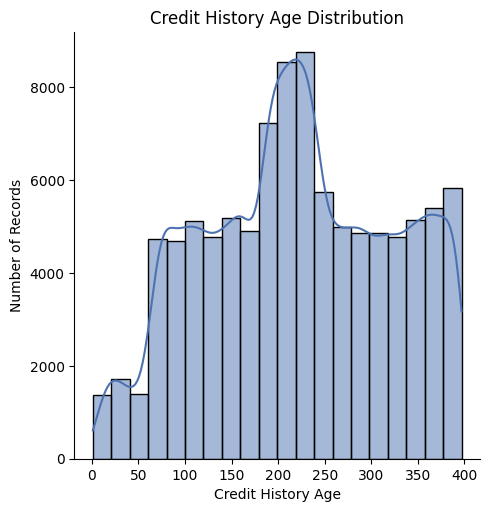

In [ ]:
column_name = 'Credit_History_Age'
group_by = 'Customer_ID'
user_friendly_name = 'Credit History Age'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,datatype=float)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name)

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  14950

Distribution of column:

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min        0.0
max    82331.0
Name: Total_EMI_per_month, dtype: float64

After Cleaning Min, Max Values:
min       0.000000
max    1779.103254
Name: Total_EMI_per_month, dtype: float64

No. of Unique values after Cleaning: 11890

No. of Null values after Cleaning: 0

-----------------------------------------------------

Total EMI per month Distribution


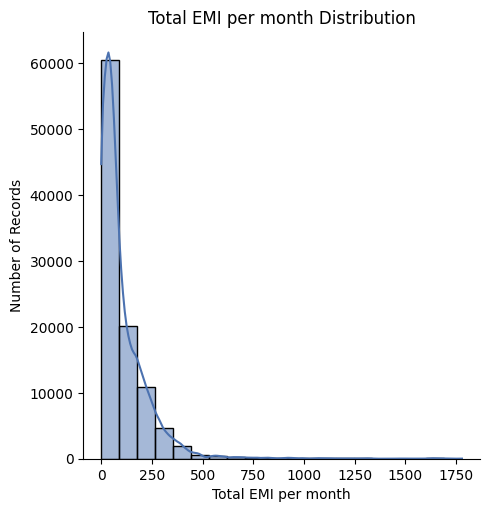

In [ ]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'
user_friendly_name = 'Total EMI per month'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name)

Details of Amount_invested_monthly column

DataType:  object

There are  4479  null values

Number of Unique Values:  91049

Distribution of column:

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Amount_invested_monthly is changed to <class 'float'>

Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

After Cleaning Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

No. of Unique values after Cleaning: 91049

No. of Null values after Cleaning: 0

--------------------------

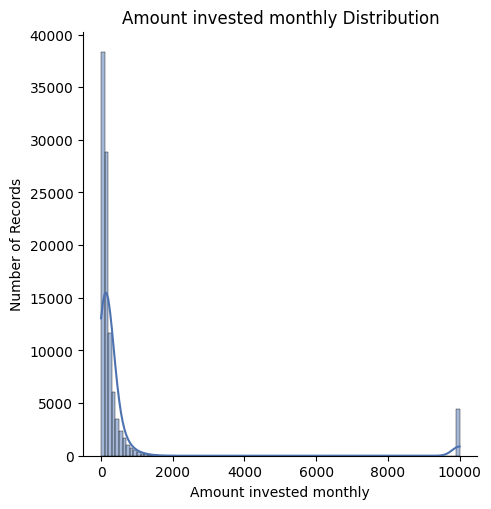

In [ ]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'
user_friendly_name = 'Amount invested monthly'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,datatype=float,strip='_')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=100)

Details of Monthly_Balance column

DataType:  object

There are  1200  null values

Number of Unique Values:  98792

Distribution of column:

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value __-333333333333333333333333333__ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Monthly_Balance is changed to <class 'float'>

Existing Min, Max Values:
min       0.007760
max    1602.040519
Name: Monthly_Balance, dtype: float64

After Cleaning Min, Max Values:
min       0.0077

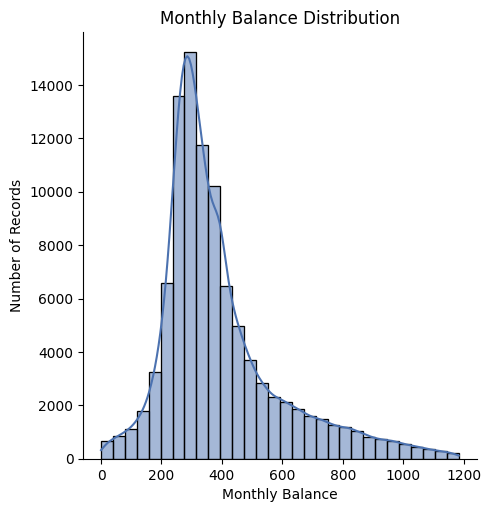

In [ ]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Balance'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
df_train[column_name].replace('',np.nan)
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float,replace_value='__-333333333333333333333333333__')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=30)

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  434

Distribution of column:

3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: Num_of_Loan, Length: 434, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Loan is changed to <class 'float'>

Existing Min, Max Values:
min    -100.0
max    1496.0
Name: Num_of_Loan, dtype: float64

After Cleaning Min, Max Values:
min    0.0
max    9.0
Name: Num_of_Loan, dtype: float64

No. of Unique values after Cleaning: 10

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Loan Distribution


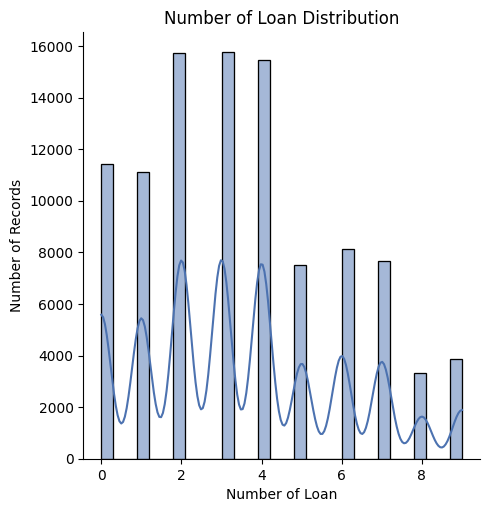

In [ ]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Loan'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=30)

In [ ]:
#Check if null values are present
df_train.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Drop columns

In [ ]:
#Drop columns
print("Size of Dataset before dropping columns : ",df_train.shape)
drop_columns = ['ID','Customer_ID','Name','SSN']
df_train.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_train.shape)

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

In [ ]:
df_train

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.944960,265.0,1,49.574949,118.280222,3,284.629162,0
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,...,1,502.38,34.663572,378.0,1,35.104023,60.971333,0,393.788917,1
99996,5,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,...,1,502.38,40.565631,379.0,1,35.104023,54.185950,1,393.788917,1
99997,6,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,...,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,393.788917,1
99998,7,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,...,1,502.38,33.638208,381.0,1,35.104023,251.672582,3,393.788917,2


In [ ]:
#Spli Input & Output Data
X = df_train.drop('Credit_Score',axis=1)
y = df_train['Credit_Score']
print(X.shape)
print(y.shape)

(100000, 23)
(100000,)


In [ ]:
#Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
#Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 23)
(30000, 23)
(70000,)
(30000,)


In [ ]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

In [ ]:
# List of classifiers to test
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Decision Tree
Average Accuracy: 0.7168
Average Precision: 0.6981
Average Recall: 0.6984
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8096
Average Precision: 0.7976
Average Recall: 0.8038
-----------------------
Classifier: KNN
Average Accuracy: 0.7005
Average Precision: 0.6728
Average Recall: 0.6834
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      5349
           1       0.80      0.84      0.82      8699
           2       0.85      0.82      0.83     15952

    accuracy                           0.82     30000
   macro avg       0.81      0.82      0.81     30000
weighted avg       0.82      0.82      0.82     30000


---------------------------------------------



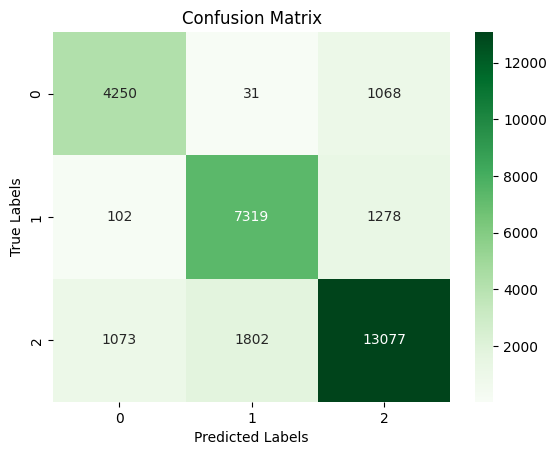

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

In [ ]:
#Handle Imbalance Data
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

In [ ]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  int64  
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [ ]:
df_train.isnull().sum().sum()

0

In [ ]:
df_train['Age'] = df_train.Age.astype(int)
df_train.dropna(subset=['Credit_Score'], inplace=True)
df_train.dropna(subset=['Monthly_Balance'], inplace=True)
df_train.dropna(subset=['Payment_Behaviour'], inplace=True)
df_train.dropna(subset=['Amount_invested_monthly'], inplace=True)

In [ ]:
df_train.to_csv("DaXuLyDuLieu.csv")

In [ ]:
df = pd.read_csv('/content/DaXuLyDuLieu.csv')
df

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,1,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,1,2,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.944960,265.0,1,49.574949,118.280222,3,284.629162,0
2,2,3,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,3,4,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,4,5,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,4,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,34.663572,378.0,1,35.104023,60.971333,0,393.788917,1
99996,99996,5,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,40.565631,379.0,1,35.104023,54.185950,1,393.788917,1
99997,99997,6,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,393.788917,1
99998,99998,7,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,33.638208,381.0,1,35.104023,251.672582,3,393.788917,2
